In [35]:
from neuron import h
from neuron.units import mV, ms, sec, um, us
from matplotlib import pyplot, cm
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

h.nrn_load_dll("x86_64/vecevent.so")

#filename = "DATA/Pyrp22.hoc"

#h.load_file(filename)

#h.nrn_load_dll("x86_64/vecevent.so")

ddir = "L5bPCmodelsEH/"

h.load_file("import3d.hoc")
h.load_file("stdgui.hoc")
#h.load_file("stdgui.hoc")
#h.load_file(ddir+"init.hoc")

morphology_file = ddir+"morphologies/cell1.asc"

h.load_file(ddir+"models/L5PCbiophys3.hoc")
h.load_file(ddir+"models/L5PCtemplate.hoc")

h.L5PCtemplate(morphology_file)

L5PCtemplate[2]

In [10]:
Sections = [i for i in h.allsec() if ("axon" not in str(i))and("soma" not in str(i))]

Soma = [i for i in h.allsec() if "soma" in str(i)]


In [17]:

#allfiles = [i for i in os.listdir("DATA/") if "PotentialMonit_pair_Both_200000_" in i and os.path.isfile("DATA/"+i)]

#VState = pd.read_csv("DATA/"+allfiles[0])

#VState

In [12]:

VSm, VSstd, VSp = VState.mean(),VState.std(), VState.sum()/len(VState)


In [13]:

data = pd.read_csv("Inputs_info_Both_num_16.csv")


In [14]:
Cat = sorted(list(set(data.Category.values)))

In [7]:
data["VSp"] = VSp.values[1:]


ValueError: Length of values (6) does not match length of index (50)

KeyError: 'Column not found: VSp'

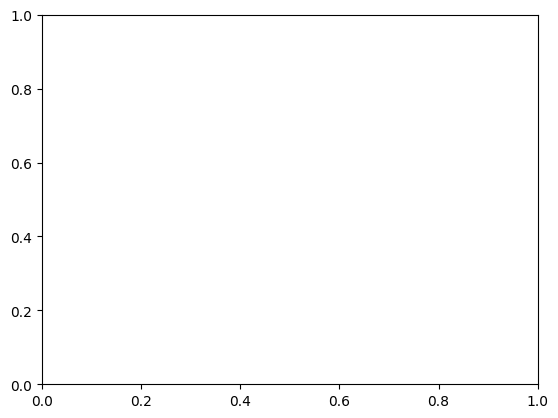

In [8]:
#data.boxplot(column=['VSp'],ax=["Category"])

data.boxplot(column=['VSp'],by=["Category"])


In [9]:
from scipy.io import loadmat

allfiles = [i for i in os.listdir('DATA/') if '.mat' in i and 'simBoth_200000_' in i]

recordings = loadmat('DATA/'+allfiles[0])

dt = recordings['dt'][0][0]

time = np.arange(0,len(recordings['Soma'][0])*dt,dt)

NumSen = recordings['Sensors'].shape[0]

In [88]:
vdata = pd.DataFrame(columns=['soma']+[str(i) for i in data.InpIndx])

#recordings['Sensors']

vdata.iloc[:,0] = recordings['Sensors'][0]

for i in range(len(data.InpIndx)):

    vdata.iloc[:,1+i] = recordings['Sensors'][i]


/tmp/ipykernel_6189/1210216954.py:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  vdata.iloc[:,1+i] = recordings['Sensors'][i]


In [11]:

vdata.to_csv('DATA/'+allfiles[0].split('.')[0]+'.csv',index=False)


In [12]:
Somalm = recordings['Soma'][0][10000:]#-np.mean(recordings['Soma'][0][10000:])
Sensors = []
Thres = []

for i in range(NumSen):
    Vlm = recordings['Sensors'][i][10000:]#-np.mean(recordings['Sensors'][i][10000:])
    
    Sensors.append(Vlm)

    Thres.append(np.mean(recordings['Sensors'][i][10000:]))

Sensors = np.array(Sensors)
Thres = np.array(Thres)

Thres.shape

(50,)

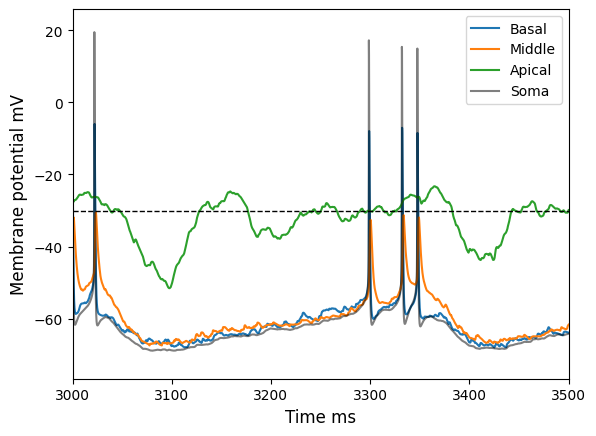

In [453]:
i = 0

plt.plot(time[10000:],recordings["Sensors"][i][10000:],label="Basal")
plt.plot(time[10000:],recordings["Sensors"][25][10000:],label="Middle")
plt.plot(time[10000:],recordings["Sensors"][-1][10000:],label="Apical")

plt.plot(time[10000:],recordings["Soma"][0][10000:],'k',label="Soma",alpha=0.5)

plt.axhline(-30,color='k',linestyle='dashed',lw=1)

plt.xlim(3000,3500)

plt.legend()

plt.xlabel("Time ms",fontsize=12)
plt.ylabel("Membrane potential mV",fontsize=12)

plt.savefig("Membrane_pot_follow_Soma.png",dpi=300,bbox_inches="tight")


Text(0.5, 0, 'Time ms')

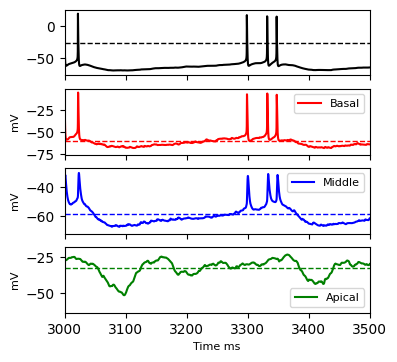

In [454]:
cm = 1/2.54

fig,ax = plt.subplots(4,1,figsize=(10*cm,10*cm))

ax[0].plot(time[10000:],Somalm,'k',label="Soma")

ax[0].axhline(5*np.std(Somalm)+np.mean(Somalm),color='k',linestyle='dashed',lw=1)

ax[0].tick_params(labelbottom=False)  

ini,ifi = 3000,3500

ax[0].set_xlim(ini,ifi)

cl = ['r','b','g']
lab = ['Basal','Middle','Apical']
p = [0,25,-1]

for i in range(3):
    
    ax[1+i].plot(time[10000:],Sensors[p[i]],cl[i],label=lab[i])
    
    ax[1+i].axhline(Thres[p[i]],color=cl[i],linestyle='dashed',lw=1)

    ax[1+i].set_xlim(ini,ifi)

    if i<2:
        ax[1+i].tick_params(labelbottom=False)

    ax[1+i].legend(fontsize=8)

    ax[1+i].set_ylabel("mV",fontsize=8)

ax[3].set_xlabel("Time ms",fontsize=8)


In [13]:
timebin = 1

TimeSeries = np.zeros([len(time),NumSen+1],dtype=np.int8)

TimeSeries[:,0] = 1*(recordings["Soma"][0]>-30)

for i in range(0,NumSen,1):
    
    TimeSeries[:,i+1] = 1*(recordings['Sensors'][i]>Thres[i])

Tw = int(timebin/dt)
TT = len(time)
NT = int(TT/Tw)

TSer = np.zeros([NT,NumSen+1],dtype=np.int8)

for i in range(NT-1):
    
    TSer[i,:] = 1*(np.sum(TimeSeries[Tw*i:Tw*(i+1),:],axis=0)>0)


In [14]:
TimeSeries = np.zeros([len(time),NumSen+1],dtype=np.int8)

TimeSeries[:,0] = 1*(recordings["Soma"][0]>-30)

for i in range(0,NumSen,1):
    
    TimeSeries[:,i+1] = 1*(recordings['Sensors'][i]>-30)

Tw = int(timebin/dt)
TT = len(time)
NT = int(TT/Tw)

TSerBad = np.zeros([NT,NumSen+1],dtype=np.int8)

for i in range(NT-1):
    
    TSerBad[i,:] = 1*(np.sum(TimeSeries[Tw*i:Tw*(i+1),:],axis=0)>0)


In [15]:
dendIndxInp = data.InpIndx.values

In [16]:

Labels = [str(Soma[0])]

Labels += [str(Sections[i]) for i in dendIndxInp]

Data = pd.DataFrame(columns = Labels)

for i in range(len(Labels)):
    
    Data[Data.columns[i]] = TSer[:,i]


In [17]:
Cat = data.Category.values


In [17]:

def Plot_Raster(TSer,tbin=1,Tt = 4000,tdelay=0,ti=4000,Save=False):
    cl = ['r','b','g']
    
    cm = 1./2.54
    
    fig,ax = plt.subplots(1,1,figsize=(12*cm,8*cm))
    
    fs = 10
    
    for i in range(0,len(Cat)):
        
        tsp = np.where(TSer[int(ti/tbin):int(ti/tbin)+int(Tt/tbin),i+1] == 1)[0]*tbin
        
        if Cat[i]=="Basal":
            j = 0
        elif Cat[i]=="Mid":
            j = 1
        else:
            j = 2
        
        ax.scatter(tsp,(1+i)*np.ones(tsp.shape[0]),s=0.1,c=cl[j],alpha=0.5)
    
    tsp = np.where(TSer[int(ti/tbin):int(ti/tbin)+int(Tt/tbin),0] == 1)[0]*tbin - tdelay*tbin
    
    ax.scatter(tsp,0*np.ones(tsp.shape[0]),c='k',s=1)
    
    ax.set_ylabel("Monitoring point",fontsize=fs)
    
    ax.set_xlabel("Time ms",fontsize=fs)
    
    ax.spines[['top','right']].set_visible(False)
    
    ax.text(Tt+0.05*Tt,42,'Apical',ha='center',va='center',rotation=90)
    ax.text(Tt+0.05*Tt,27,'Middle',ha='center',va='center',rotation=90)
    ax.text(Tt+0.05*Tt,10,'Basal',ha='center',va='center',rotation=90)
    
    ax.text(Tt+0.15*Tt,0,'Soma spike',ha='center',va='center')
    
    ax.tick_params(labelsize=fs)

    if Save==True:
        plt.savefig("Raster_plot_tbin_"+str(tbin)+"_Tdelay_"+str(tdelay)+".png",dpi=400,bbox_inches="tight")

    return ax


<Axes: xlabel='Time ms', ylabel='Monitoring point'>

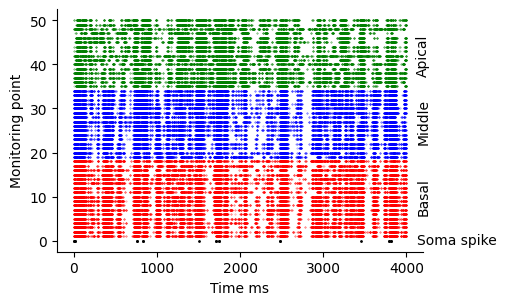

In [19]:
Plot_Raster(TSer,tbin=1,Tt=4000,tdelay=20,Save=True)

In [20]:
ttbin = 11

Twin = int(TSer.shape[0]/ttbin)

Tserbin = np.zeros([Twin,TSer.shape[1]],dtype=np.int8)

for i in range(Twin):

    Tserbin[i,:] = np.sum(TSer[i*ttbin:(i+1)*ttbin,:],axis=0)>0


<Axes: xlabel='Time ms', ylabel='Monitoring point'>

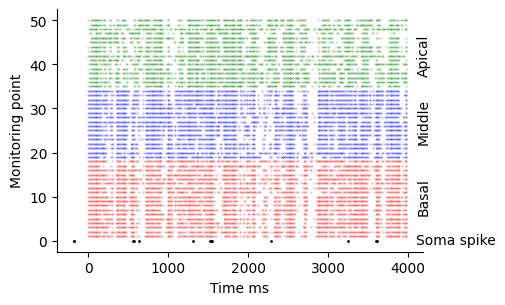

In [21]:

Plot_Raster(Tserbin,tbin=ttbin,Tt=4000,tdelay=20,ti=4000,Save=True)


In [22]:
ttbin = 1

Twin = int(TSerBad.shape[0]/ttbin)

Tserbin = np.zeros([Twin,TSerBad.shape[1]],dtype=np.int8)

for i in range(Twin):

    Tserbin[i,:] = np.sum(TSerBad[i*ttbin:(i+1)*ttbin,:],axis=0)>0


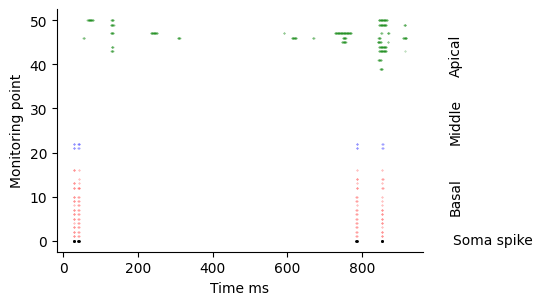

In [23]:
tbin = 1
tdelay = 0

Plot_Raster(Tserbin,tbin=tbin,Tt=1000,tdelay=tdelay)#,Save=True)

plt.savefig("RasterBad_plot_tbin_"+str(tbin)+"_Tdelay_"+str(tdelay)+".png",dpi=400,bbox_inches="tight")


In [52]:
Case = "Both"

tmax = 200000


In [75]:
#filename = "Sim_ThresVar_"+'_'.join(allfiles[0].split("_")[2:])

#filename = filename.split('.')[0]

ddir = "DATA/"

dirs = [i for i in os.listdir(ddir) if os.path.isdir(ddir+i)==True and ".i" not in i and "_pair_"in i]

filename = [i for i in os.listdir(ddir) if ".csv" in i and "Simulation_" in i]

dirsi = dirs[0]

In [131]:
listInp = [0,1,29,30,45,46]

data = pd.read_csv("Inputs_info_Both_num_16.csv")

data = data.set_index('InpIndx').iloc[listInp]

data = data.reset_index()

#Data.to_csv("DATA/"+filename+".csv",index=False)

#allfiles


In [132]:
Data = pd.read_csv('DATA/'+filename[0])


In [133]:
SomaSpikTrain = Data.iloc[:,0].values

p = np.sum(SomaSpikTrain)/len(SomaSpikTrain)

HSoma = -(p*np.log2(p)+(1-p)*np.log2(1-p))

HSoma

0.03622373263796681

In [134]:
filesH = [i for i in os.listdir('DATA/'+dirsi) if 'Target_entropy' in i]

filesH = sorted(filesH,key= lambda x: np.float32(x.split('_')[3].split('.')[0]))

H_target = []
timebins = []

for i in range(len(filesH)):
    
    H_target.append(pd.read_csv('DATA/'+dirsi+'/'+filesH[i],header=None).values[0][0])
    
    timebins.append(np.int32((filesH[i].split('_')[-1]).split('.')[0]))
    
H_target = np.array(H_target)
timebins = np.array(timebins)


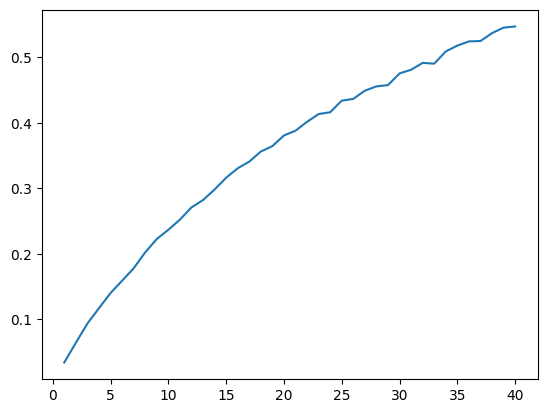

In [135]:
plt.plot(timebins,H_target)

In [136]:

allfiles = os.listdir(ddir+dirsi)

files = [i for i in allfiles if "PID_" in i and ".txt" in i]

files = sorted(files,key= lambda x: (x.split("_")[1],np.int32(x.split("_")[3]),np.int32(x.split("_")[5].split(".t")[0])))


In [137]:
def PID_tau_tbin(dirsi):
        
    allfiles = os.listdir(dirsi)

    files = [i for i in allfiles if "PID_" in i and ".txt" in i]

    files = sorted(files,key= lambda x: (x.split("_")[1],np.int32(x.split("_")[3]),np.int32(x.split("_")[5].split(".")[0])))

    taus = np.unique([np.int32(i.split("_")[3]) for i in files])

    timebins = np.unique([np.int32(i.split("_")[5].split(".")[0]) for i in files])

    Files = []

    for t in taus:

        filest = []

        for tb in timebins:

            fil = []

            for i in files:

                if "_tau_"+str(t)+"_timebin_"+str(tb)+"." in i:

                    fil.append(i)

            filest.append(fil)

        Files.append(filest)
    
    plot = False
    
    PIDtau = []

    for k in range(len(taus)):

        cm = 1./2.54

        PIDbin = []

        for j in range(len(timebins)):

            PIDmatrix = []

            #LabNam = [Files[k][j][i].split("_")[1] for i in range(len(Files[k][j]))]

            #print("tau=",taus[k]," timebin=",timebins[j])

            for i in range(len(Files[k][j])):

                Datos = pd.read_csv(dirsi+"/"+Files[k][j][i],sep=',',header=None)
                
                PIDmatrix.append(Datos.values)

            PIDbin.append(PIDmatrix)

        PIDtau.append(PIDbin)
    
    PIDM = np.array(PIDtau)

    PIDsum = np.sum(PIDM,axis=4)
    
    return PIDsum,timebins,taus,PIDM


In [138]:
dirs[0]

'Simulation_pair_PotentialMonit_Both_200000_Cell_Pyr_p1__timebin_1_numinputs_5002_ISInoise_400_avgnumspikes_575'

In [139]:
PIDMs = []
PIDS = []
TarEntrD = []

for ni in range(len(dirs)):
        
    dirsis = ddir+dirs[ni]

    allfiles = [i for i in os.listdir(dirsis) if "Target" in i]

    allfiles = sorted(allfiles,key= lambda x: int(x.split("_")[-1].split(".")[0]))

    TarEntr = []

    for i in allfiles:

        TarEntr.append(pd.read_csv(dirsis+"/"+i,header=None).values[0][0])

    TarEntrD.append(TarEntr)
    
    PIDsum,timebins,taus,PIDM = PID_tau_tbin(dirsis)
    
    PIDMs.append(PIDM)
    PIDS.append(PIDsum)

PIDMs = np.array(PIDMs)


In [140]:
ss = PIDMs.shape[-1]
aa = PIDMs.shape[1]
bb = PIDMs.shape[2]


In [141]:
j = 0

IMm = np.mean(np.sum(PIDMs[j],axis=2).reshape([aa,bb,ss**2]),axis=2)

IMstd = np.std(np.sum(PIDMs[j],axis=2).reshape([aa,bb,ss**2]),axis=2)

itau,itbin = np.where(IMm==np.max(IMm))

OpTimScale = taus[itau]*timebins[itbin][0]

OpTimScale


array([40], dtype=int32)

In [142]:
levels = data.Level.values

idxs = np.argsort(levels)


In [143]:
category = data.Category.values

dicc = {'Basal':0,'Mid':1,'Api':2}

cnum = []

for c in category:

    cnum.append(dicc[c])

np.array([cnum,list(levels)]).T;

idxs

array([0, 1, 2, 3, 5, 4])

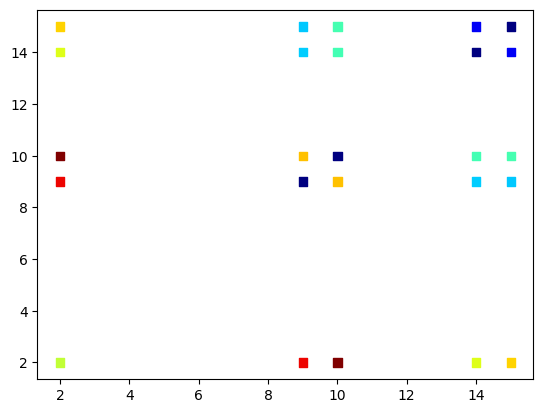

In [144]:
tdmiopt = np.sum(PIDMs[j],axis=2)[0,-1,:,:]

tdmiopt = tdmiopt[idxs,:][:,idxs]

xx,yy = np.meshgrid(levels[idxs],levels[idxs])

#plt.scatter(xx.flatten(),yy.flatten(),c=tdmiopt.flatten(),cmap='jet')

datal = pd.DataFrame()

datal['x'] = xx.flatten()
datal['y'] = yy.flatten()

datal['tdmi'] = tdmiopt.flatten()

datag = datal.groupby(by=['x','y'])

tmg = datag.describe()['tdmi']['mean']

pairxy = np.array(list(tmg.index))

tdmim = tmg.values

plt.scatter(pairxy[:,0],pairxy[:,1],c=tdmim,marker='s',cmap='jet')


In [145]:

TDMIopt = tdmiopt.reshape([ss,ss])

TDMIopt

array([[0.        , 0.02101731, 0.01399431, 0.01540071, 0.00800324,
        0.01060377],
       [0.02101731, 0.        , 0.01859379, 0.02059589, 0.01432883,
        0.01405953],
       [0.01399431, 0.01859379, 0.        , 0.01269097, 0.00586033,
        0.00577927],
       [0.01540071, 0.02059589, 0.01269097, 0.        , 0.00779911,
        0.00782149],
       [0.00800324, 0.01432883, 0.00586033, 0.00779911, 0.        ,
        0.00182924],
       [0.01060377, 0.01405953, 0.00577927, 0.00782149, 0.00182924,
        0.        ]])

In [146]:
BasalIndx = np.array(list(data[data['Category']=='Basal'].index))
MidIndx = np.array(list(data[data['Category']=='Mid'].index))
ApiIndx = np.array(list(data[data['Category']=='Api'].index))


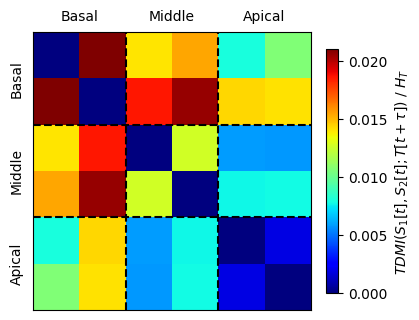

In [164]:

cm = 1./2.54

fig = plt.figure(figsize=(10*cm,10*cm))

plt.imshow(TDMIopt,cmap='jet')

#plt.xlim(0,50)
#plt.ylim(0,49)

"""
plt.text(-8,9,'Basal',rotation=90,va='center')
plt.text(-8,25,'Middle',rotation=90,va='center')
plt.text(-8,42,'Apical',rotation=90,va='center')

plt.text(9,51,'Basal',ha='center')
plt.text(25,51,'Middle',ha='center')
plt.text(42,51,'Apical',ha='center')
"""

plt.axhline(np.max(BasalIndx)+0.5,color='k',linestyle="--")
plt.axhline(np.max(MidIndx)+0.5,color='k',linestyle="--")

plt.axvline(np.max(BasalIndx)+0.5,color='k',linestyle="--")
plt.axvline(np.max(MidIndx)+0.5,color='k',linestyle="--")

plt.text(-1,0.5,'Basal',rotation=90,va='center')
plt.text(-1,2.5,'Middle',rotation=90,va='center')
plt.text(-1,4.5,'Apical',rotation=90,va='center')

plt.text(0.5,-.75,'Basal',ha='center')
plt.text(2.5,-.75,'Middle',ha='center')
plt.text(4.5,-.75,'Apical',ha='center')

plt.xticks([])
plt.yticks([])

plt.colorbar(label=r"$TDMI(S_1[t],S_2[t];T[t+\tau])$ / $H_{T}$",fraction=0.04, pad=0.05)

plt.savefig("Fraction_UR.png",dpi=300,bbox_inches="tight")


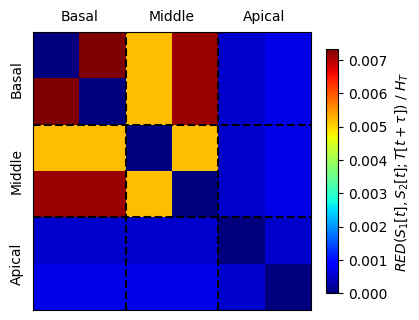

In [167]:

cm = 1./2.54

fig = plt.figure(figsize=(10*cm,10*cm))

plt.imshow(PIDM[0,-1,0],cmap='jet')

#plt.xlim(0,50)
#plt.ylim(0,49)

"""
plt.text(-8,9,'Basal',rotation=90,va='center')
plt.text(-8,25,'Middle',rotation=90,va='center')
plt.text(-8,42,'Apical',rotation=90,va='center')

plt.text(9,51,'Basal',ha='center')
plt.text(25,51,'Middle',ha='center')
plt.text(42,51,'Apical',ha='center')
"""

plt.axhline(np.max(BasalIndx)+0.5,color='k',linestyle="--")
plt.axhline(np.max(MidIndx)+0.5,color='k',linestyle="--")

plt.axvline(np.max(BasalIndx)+0.5,color='k',linestyle="--")
plt.axvline(np.max(MidIndx)+0.5,color='k',linestyle="--")

plt.text(-1,0.5,'Basal',rotation=90,va='center')
plt.text(-1,2.5,'Middle',rotation=90,va='center')
plt.text(-1,4.5,'Apical',rotation=90,va='center')

plt.text(0.5,-.75,'Basal',ha='center')
plt.text(2.5,-.75,'Middle',ha='center')
plt.text(4.5,-.75,'Apical',ha='center')

plt.xticks([])
plt.yticks([])

plt.colorbar(label=r"$RED(S_1[t],S_2[t];T[t+\tau])$ / $H_{T}$",fraction=0.04, pad=0.05)

plt.savefig("Fraction_Red.png",dpi=300,bbox_inches="tight")


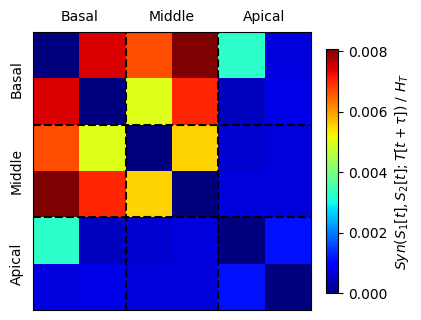

In [168]:

cm = 1./2.54

fig = plt.figure(figsize=(10*cm,10*cm))

plt.imshow(PIDM[0,-1,1],cmap='jet')

"""
plt.xlim(0,50)
plt.ylim(0,49)

plt.text(-8,9,'Basal',rotation=90,va='center')
plt.text(-8,25,'Middle',rotation=90,va='center')
plt.text(-8,42,'Apical',rotation=90,va='center')

plt.text(9,51,'Basal',ha='center')
plt.text(25,51,'Middle',ha='center')
plt.text(42,51,'Apical',ha='center')
"""

plt.axhline(np.max(BasalIndx)+0.5,color='k',linestyle="--")
plt.axhline(np.max(MidIndx)+0.5,color='k',linestyle="--")

plt.axvline(np.max(BasalIndx)+0.5,color='k',linestyle="--")
plt.axvline(np.max(MidIndx)+0.5,color='k',linestyle="--")

plt.text(-1,0.5,'Basal',rotation=90,va='center')
plt.text(-1,2.5,'Middle',rotation=90,va='center')
plt.text(-1,4.5,'Apical',rotation=90,va='center')

plt.text(0.5,-.75,'Basal',ha='center')
plt.text(2.5,-.75,'Middle',ha='center')
plt.text(4.5,-.75,'Apical',ha='center')

plt.xticks([])
plt.yticks([])

plt.colorbar(label=r"$Syn(S_1[t],S_2[t];T[t+\tau])$ / $H_{T}$",fraction=0.04, pad=0.05)

plt.savefig("Fraction_Syn.png",dpi=300,bbox_inches="tight")


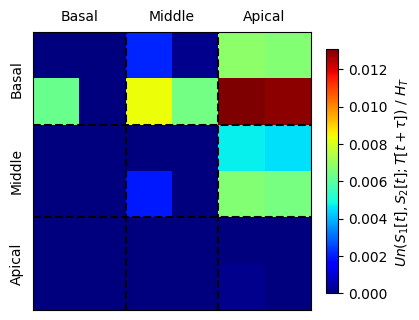

In [172]:

cm = 1./2.54

fig = plt.figure(figsize=(10*cm,10*cm))

plt.imshow(PIDM[0,-1,2],cmap='jet')

"""
plt.xlim(0,50)
plt.ylim(0,49)

plt.text(-8,9,'Basal',rotation=90,va='center')
plt.text(-8,25,'Middle',rotation=90,va='center')
plt.text(-8,42,'Apical',rotation=90,va='center')

plt.text(9,51,'Basal',ha='center')
plt.text(25,51,'Middle',ha='center')
plt.text(42,51,'Apical',ha='center')
"""

plt.axhline(np.max(BasalIndx)+0.5,color='k',linestyle="--")
plt.axhline(np.max(MidIndx)+0.5,color='k',linestyle="--")

plt.axvline(np.max(BasalIndx)+0.5,color='k',linestyle="--")
plt.axvline(np.max(MidIndx)+0.5,color='k',linestyle="--")

plt.text(-1,0.5,'Basal',rotation=90,va='center')
plt.text(-1,2.5,'Middle',rotation=90,va='center')
plt.text(-1,4.5,'Apical',rotation=90,va='center')

plt.text(0.5,-.75,'Basal',ha='center')
plt.text(2.5,-.75,'Middle',ha='center')
plt.text(4.5,-.75,'Apical',ha='center')

plt.xticks([])
plt.yticks([])

plt.colorbar(label=r"$Un(S_1[t],S_2[t];T[t+\tau])$ / $H_{T}$",fraction=0.04, pad=0.05)

plt.savefig("Fraction_Un.png",dpi=300,bbox_inches="tight")


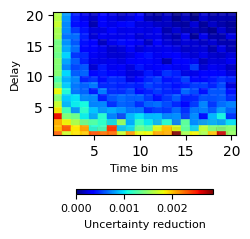

In [134]:

xx,yy = np.meshgrid(taus,timebins)

cm = 1./2.54

fig,ax = plt.subplots(1,1,figsize=(6*cm,6*cm))

ax.scatter(yy.flatten(),xx.flatten(),c=IMm.flatten(),cmap="jet",marker='s',s=50,alpha=0.9)

ax.set_xlim(.5,20.5)

ax.set_ylim(.5,20.5)

fs = 8

ax.set_xlabel("Time bin ms",fontsize=fs)
ax.set_ylabel("Delay",fontsize=fs)

sm = plt.cm.ScalarMappable(cmap="jet", norm=plt.Normalize(vmin=0, vmax=np.max(IMm)))

cms = plt.colorbar(sm,ax=ax,fraction=0.025,orientation="horizontal",shrink=1,pad=0.3,aspect=30)

cms.set_label(r"Uncertainty reduction", fontsize=fs)

cms.ax.tick_params(labelsize=fs)

plt.savefig("CORRECT_THRESHLODING.png",dpi=300,bbox_inches="tight")
#plt.savefig("BAD_THRESHLODING.png",dpi=300,bbox_inches="tight")


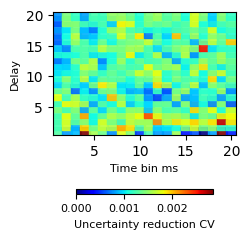

In [136]:

xx,yy = np.meshgrid(taus,timebins)

cm = 1./2.54

fig,ax = plt.subplots(1,1,figsize=(6*cm,6*cm))

ax.scatter(yy.flatten(),xx.flatten(),c=(IMstd/IMm).flatten(),cmap="jet",marker='s',s=50,alpha=0.9)

ax.set_xlim(.5,20.5)

ax.set_ylim(.5,20.5)

fs = 8

ax.set_xlabel("Time bin ms",fontsize=fs)
ax.set_ylabel("Delay",fontsize=fs)

sm = plt.cm.ScalarMappable(cmap="jet", norm=plt.Normalize(vmin=0, vmax=np.max(IMm)))

cms = plt.colorbar(sm,ax=ax,fraction=0.025,orientation="horizontal",shrink=1,pad=0.3,aspect=30)

cms.set_label(r"Uncertainty reduction CV", fontsize=fs)

cms.ax.tick_params(labelsize=fs)

#plt.savefig("CORRECT_THRESHLODING_TDMI_CV.png",dpi=300,bbox_inches="tight")
#plt.savefig("BAD_THRESHLODING.png",dpi=300,bbox_inches="tight")


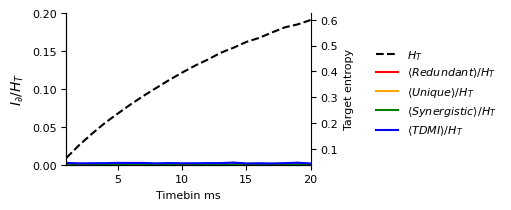

In [137]:
PIDmean = np.mean(PIDM[:,0].reshape([20,4,50*50]),axis=2)

TDMImean = np.mean(np.sum(PIDM[:,0].reshape([20,4,50*50]),axis=1),axis=1)

cm = 1./2.54

fig,ax = plt.subplots(1,1,figsize=(8*cm,5*cm))

ax.plot(timebins,PIDmean[:,0],'r',label=r"$\left\langle Redundant \right\rangle/H_T$")
ax.plot(timebins,PIDmean[:,3],'orange',label=r"$\left\langle Unique \right\rangle/H_T$")
ax.plot(timebins,PIDmean[:,1],'g',label=r"$\left\langle Synergistic \right\rangle/H_T$")

ax.plot(timebins,TDMImean,'b',label=r"$\left\langle TDMI \right\rangle/H_T$")

ax.tick_params(labelsize=fs)

ax.legend(loc=(1.25,0.15),frameon=False,fontsize=fs)

ax.set_xlim(1,20)
ax.set_ylim(0,0.2)

ax.set_ylabel(r"$I_{\partial}/H_{T}$",fontsize=10)
ax.set_xlabel("Timebin ms",fontsize=fs)

ax1 = ax.twinx()

ax.spines[['top','right']].set_visible(False)
ax1.spines[['top']].set_visible(False)

ax1.plot(timebins,H_target,'--k',label=r"$H_T$")

ax1.set_ylabel("Target entropy",fontsize=fs)

ax1.tick_params(labelsize=fs)

ax1.legend(loc=(1.25,0.65),frameon=False,fontsize=fs)

#plt.savefig("Partial_info_fractions_timebins_timedelay_1.png",dpi=300,bbox_inches="tight")


Text(0.5, 0, 'Time delay ms')

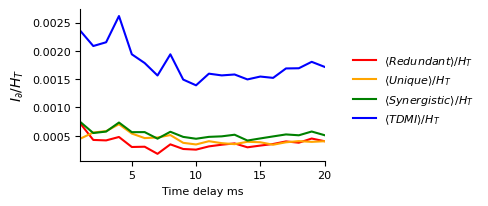

In [139]:
PIDmean = np.mean(PIDM[0,:].reshape([20,4,50*50]),axis=2)

TDMImean = np.mean(np.sum(PIDM[0,:].reshape([20,4,50*50]),axis=1),axis=1)

cm = 1./2.54

fig,ax = plt.subplots(1,1,figsize=(8*cm,5*cm))

ax.plot(taus,PIDmean[:,0],'r',label=r"$\left\langle Redundant \right\rangle/H_T$")
ax.plot(taus,PIDmean[:,3],'orange',label=r"$\left\langle Unique \right\rangle/H_T$")
ax.plot(taus,PIDmean[:,1],'g',label=r"$\left\langle Synergistic \right\rangle/H_T$")

ax.plot(timebins,TDMImean,'b',label=r"$\left\langle TDMI \right\rangle/H_T$")

ax.spines[['top','right']].set_visible(False)

ax.tick_params(labelsize=fs)

ax.legend(loc=(1.1,0.2),frameon=False,fontsize=fs)

ax.set_xlim(1,20)

ax.set_ylabel(r"$I_{\partial}/H_{T}$",fontsize=10)
ax.set_xlabel("Time delay ms",fontsize=fs)

#ax.text(2,0.25,r"$H_T=%1.2f$"%(H_target[0]))

#plt.savefig("Partial_info_fractions_timedelay_timebins_1.png",dpi=300,bbox_inches="tight")


# CONTINOUS

In [130]:
Case = "Both"

tmax = 200000

filename = "Sim_ThresVar_"+'_'.join(allfiles[0].split("_")[2:])

filename = filename.split('.')[0]

ddir = "DATA/"

listdir = [i for i in os.listdir(ddir) if os.path.isdir(ddir+i)==True and ".i" not in i]


In [131]:
ddir = "DATA/"

allfiles = os.listdir(ddir)

dirs = [i for i in allfiles if os.path.isdir(ddir+i) and "Potential_" in i]

dirs = sorted(dirs,key=lambda x: (x.split("_")[1],x.split("_")[5]))

dirs

['Potential_values_simBoth_200000_Cell_Pyr_p1__timebin_1_numinputs_5001_ISInoise_100_avgnumspikes_10000_Continous']

In [150]:

fileH = [i for i in os.listdir('DATA/'+dirs[0]) if 'Target_entropy' in i]

for i in range(len(fileH)):
    
    H_target = pd.read_csv('DATA/'+dirs[0]+'/'+fileH[i],header=None).values[0][0]
    
H_target


2.927482978880084

In [151]:
allfiles = os.listdir('DATA/'+dirs[0])

files = [i for i in allfiles if "PID_" in i and ".txt" in i]

files = sorted(files,key= lambda x: (x.split("_")[1],np.int32(x.split("_")[3].split(".")[0])))


In [152]:
def PID_tau_c(dirsi):
            
    allfiles = os.listdir(dirsi)
    
    files = [i for i in allfiles if "PID_" in i and ".txt" in i]
    
    files = sorted(files,key= lambda x: (x.split("_")[1],np.int32(x.split("_")[3].split(".")[0])))
    
    taus = np.unique([np.int32(i.split("_")[3].split(".")[0]) for i in files])
    
    Files = []
    
    for t in taus:
    
        fil = []
    
        for i in files:
    
            if "_tau_"+str(t)+"." in i:
    
                fil.append(i)
    
        Files.append(fil)
    
    PIDtau = []
    
    for k in range(len(taus)):
    
        cm = 1./2.54
    
        PIDmatrix = []
    
        #LabNam = [Files[k][j][i].split("_")[1] for i in range(len(Files[k][j]))]
    
        #print("tau=",taus[k]," timebin=",timebins[j])
    
        for i in range(len(Files[k])):
    
            Datos = pd.read_csv(dirsi+"/"+Files[k][i],sep=',',header=None)
            
            PIDmatrix.append(Datos.values)
    
        PIDtau.append(PIDmatrix)
    
    PIDM = np.array(PIDtau)

    return taus,PIDM


In [187]:
PIDMs = []
PIDS = []

dirsi = ddir+dirs[0]

taus,PIDM = PID_tau_c(dirsi)


array([  8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96, 104,
       112, 120, 128, 136, 144, 152, 160], dtype=int32)

In [192]:

IMm = np.mean(np.sum(PIDM,axis=1).reshape([20,50*50]),axis=1)

IMstd = np.std(np.sum(PIDM,axis=1).reshape([20,50*50]),axis=1)

itau = np.where(IMm==np.max(IMm))

OpTimScale = taus[itau][0]

OpTimScale*0.125

itau

(array([0]),)

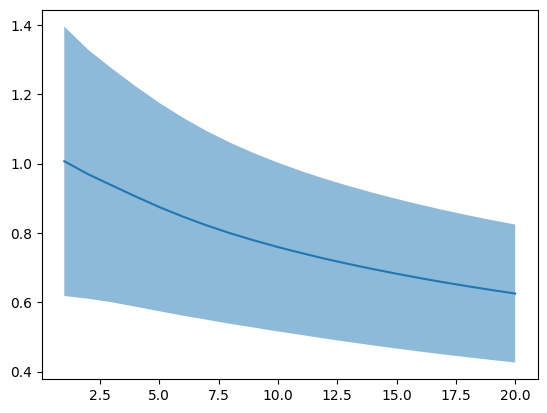

In [189]:

plt.plot(taus*0.125,IMm,'-')

plt.fill_between(taus*0.125,IMm-IMstd,IMm+IMstd,alpha=0.5)


In [155]:
tdmiopt = np.sum(PIDM,axis=1).reshape([20,50*50])[itau,:]

TDMIopt = tdmiopt.reshape([50,50])

TDMIopt[TDMIopt<0] *= 0


In [156]:
BasalIndx = np.array(list(data[data['Category']=='Basal'].index))
MidIndx = np.array(list(data[data['Category']=='Mid'].index))
ApiIndx = np.array(list(data[data['Category']=='Api'].index))


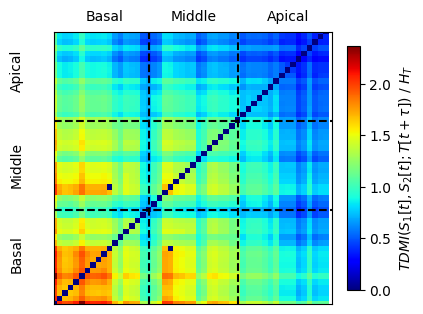

In [157]:

cm = 1./2.54

fig = plt.figure(figsize=(10*cm,10*cm))

plt.imshow(TDMIopt,cmap='jet')

plt.axhline(np.max(BasalIndx),color='k',linestyle="--")
plt.axhline(np.max(MidIndx),color='k',linestyle="--")

plt.axvline(np.max(BasalIndx),color='k',linestyle="--")
plt.axvline(np.max(MidIndx),color='k',linestyle="--")

plt.xlim(0,50)
plt.ylim(0,49)

plt.text(-8,9,'Basal',rotation=90,va='center')
plt.text(-8,25,'Middle',rotation=90,va='center')
plt.text(-8,42,'Apical',rotation=90,va='center')

plt.text(9,51,'Basal',ha='center')
plt.text(25,51,'Middle',ha='center')
plt.text(42,51,'Apical',ha='center')

plt.xticks([])
plt.yticks([])

plt.colorbar(label=r"$TDMI(S_1[t],S_2[t];T[t+\tau])$ / $H_{T}$",fraction=0.04, pad=0.05)

#plt.savefig("Fraction_UR.png",dpi=300,bbox_inches="tight")


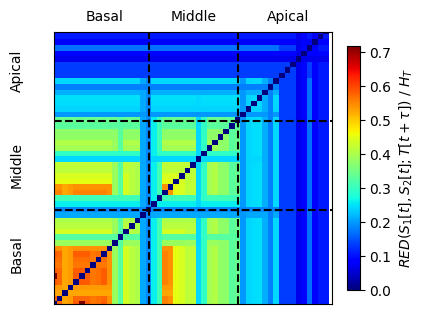

In [158]:

cm = 1./2.54

fig = plt.figure(figsize=(10*cm,10*cm))

plt.imshow(PIDM[itau[0],0][0],cmap='jet')

plt.axhline(np.max(BasalIndx),color='k',linestyle="--")
plt.axhline(np.max(MidIndx),color='k',linestyle="--")

plt.axvline(np.max(BasalIndx),color='k',linestyle="--")
plt.axvline(np.max(MidIndx),color='k',linestyle="--")

plt.xlim(0,50)
plt.ylim(0,49)

plt.text(-8,9,'Basal',rotation=90,va='center')
plt.text(-8,25,'Middle',rotation=90,va='center')
plt.text(-8,42,'Apical',rotation=90,va='center')

plt.text(9,51,'Basal',ha='center')
plt.text(25,51,'Middle',ha='center')
plt.text(42,51,'Apical',ha='center')

plt.xticks([])
plt.yticks([])

plt.colorbar(label=r"$RED(S_1[t],S_2[t];T[t+\tau])$ / $H_{T}$",fraction=0.04, pad=0.05)

#plt.savefig("Fraction_Red_Cont.png",dpi=300,bbox_inches="tight")


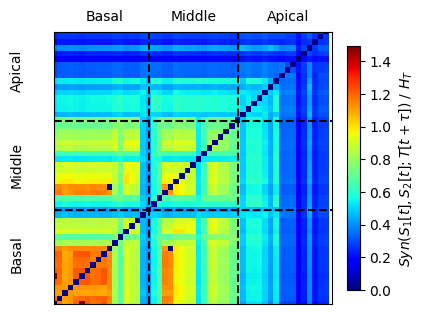

In [159]:

cm = 1./2.54

fig = plt.figure(figsize=(10*cm,10*cm))

Syn = PIDM[itau[0],1][0]

Syn[Syn<0] *= 0

plt.imshow(Syn,cmap='jet')

plt.axhline(np.max(BasalIndx),color='k',linestyle="--")
plt.axhline(np.max(MidIndx),color='k',linestyle="--")

plt.axvline(np.max(BasalIndx),color='k',linestyle="--")
plt.axvline(np.max(MidIndx),color='k',linestyle="--")

plt.xlim(0,50)
plt.ylim(0,49)

plt.text(-8,9,'Basal',rotation=90,va='center')
plt.text(-8,25,'Middle',rotation=90,va='center')
plt.text(-8,42,'Apical',rotation=90,va='center')

plt.text(9,51,'Basal',ha='center')
plt.text(25,51,'Middle',ha='center')
plt.text(42,51,'Apical',ha='center')

plt.xticks([])
plt.yticks([])

plt.colorbar(label=r"$Syn(S_1[t],S_2[t];T[t+\tau])$ / $H_{T}$",fraction=0.04, pad=0.05)

#plt.savefig("Fraction_Syn_Cont.png",dpi=300,bbox_inches="tight")


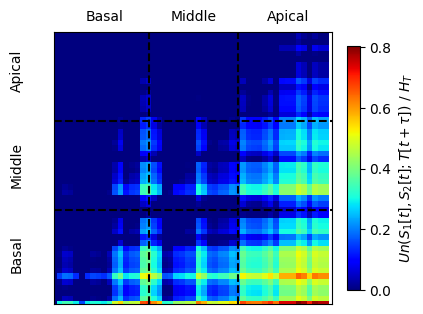

In [160]:

cm = 1./2.54

fig = plt.figure(figsize=(10*cm,10*cm))

plt.imshow(PIDM[itau[0],2][0],cmap='jet')

plt.axhline(np.max(BasalIndx),color='k',linestyle="--")
plt.axhline(np.max(MidIndx),color='k',linestyle="--")

plt.axvline(np.max(BasalIndx),color='k',linestyle="--")
plt.axvline(np.max(MidIndx),color='k',linestyle="--")

plt.xlim(0,50)
plt.ylim(0,49)

plt.text(-8,9,'Basal',rotation=90,va='center')
plt.text(-8,25,'Middle',rotation=90,va='center')
plt.text(-8,42,'Apical',rotation=90,va='center')

plt.text(9,51,'Basal',ha='center')
plt.text(25,51,'Middle',ha='center')
plt.text(42,51,'Apical',ha='center')

plt.xticks([])
plt.yticks([])

plt.colorbar(label=r"$Un(S_1[t],S_2[t];T[t+\tau])$ / $H_{T}$",fraction=0.04, pad=0.05)

#plt.savefig("Fraction_Un_Cont.png",dpi=300,bbox_inches="tight")


In [161]:
PIDmean = np.mean(PIDM.reshape([20,4,50*50]),axis=2)

TDMImean = np.mean(np.sum(PIDM.reshape([20,4,50*50]),axis=1),axis=1)

#PIDM[2,:]
